## Modelo de regresion logistica

Se corre este modelo para ver los resultados obtenidos

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",40)
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("path_datos_entrenamiento" , sep = "|")

In [3]:
df.shape

(870606, 31)

In [4]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['SUSCRIBER_KEY', 'target'],axis=1), 
                                                    df['target'], test_size=0.30, 
                                                    random_state=101)


In [5]:
#trainin y predicting
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\lenovo\ivan\python ivan\proyects\modelo_churn\modelo_churn\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
predictions = logmodel.predict(X_test)

In [7]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88    190508
           1       0.70      0.60      0.65     70674

    accuracy                           0.82    261182
   macro avg       0.78      0.75      0.76    261182
weighted avg       0.82      0.82      0.82    261182

[[171936  18572]
 [ 28039  42635]]


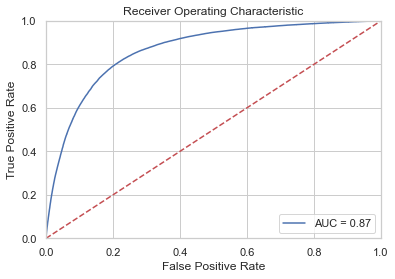

In [8]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()